In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [14]:
caminho = 'data\\destinations.csv'
df = pd.read_csv(caminho, sep = ',', encoding = 'ISO-8859-1')

In [15]:
ident_Pizza= df[df['Famous Foods'].str.contains('Pizza')]
result_pizza = ident_Pizza.groupby('Destination')['Famous Foods'].describe()
##print(result_pizza)

ident_medit = df[df['Famous Foods'].str.contains('Mediterranean cuisine')]
result_medit = ident_medit.groupby('Destination')['Famous Foods'].describe()
##print(result_medit)

ident_paella = df[df['Famous Foods'].str.contains('Paella')]
result_paella = ident_paella.groupby('Destination')['Famous Foods'].describe()

ident_bak = df[df['Famous Foods'].str.contains('Baklava')]
result_bak = ident_bak.groupby('Destination')['Famous Foods'].describe()


In [16]:
ident_fish = df[df['Famous Foods'].str.contains('Fish')]
result_fish = ident_fish.groupby('Destination')['Famous Foods'].describe()
ident_seafood = df[df['Famous Foods'].str.contains('Seafood')]
result_seafood = ident_seafood.groupby('Destination')['Famous Foods'].describe()
seafood_list = []
seafood_list.append(result_fish)
seafood_list.append(result_seafood)

final_list = pd.concat(seafood_list, ignore_index = True)




O gráfico de pizza apresenta a distribuição de destinos turísticos na Europa conforme a presença de comidas típicas relacionadas a três categorias populares: pizza, culinária mediterrânea e frutos do mar.  Observa-se que esses tipos de culinária se destacam entre os principais atrativos gastronômicos europeus. Essa visualização reforça a forte influência da gastronomia italiana e mediterrânea sobre a cultura turística do continente.

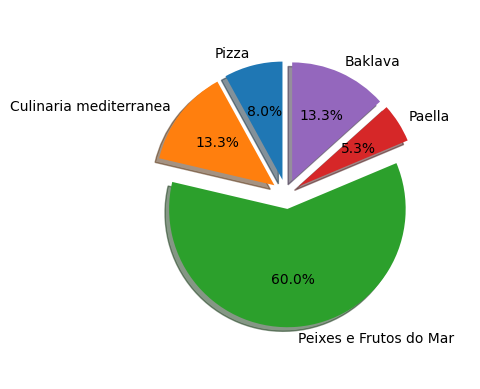

In [17]:
pizza =len(result_pizza)
medit = len(result_medit)
seafood_fish = len(final_list)
paella = len(ident_paella)
baklava = len(ident_bak)

comidas = ['Pizza','Culinaria mediterranea','Peixes e Frutos do Mar','Paella','Baklava']
food_plot = [pizza,medit,seafood_fish, paella,baklava]

plt.pie(food_plot,labels = comidas, startangle=90,
shadow=True, explode=(0.1,0.1,0.1,0.1,0.1), radius=0.8, autopct='%1.1f%%')
display(Markdown("O gráfico de pizza apresenta a distribuição de destinos turísticos na Europa conforme a presença de comidas típicas relacionadas a três categorias populares: pizza, culinária mediterrânea e frutos do mar.  Observa-se que esses tipos de culinária se destacam entre os principais atrativos gastronômicos europeus. Essa visualização reforça a forte influência da gastronomia italiana e mediterrânea sobre a cultura turística do continente."))

C:\Users\Thiago\AppData\Local\Temp\ipykernel_13100\2906156876.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rest = pd.read_csv('data\\tripadvisor_european_restaurants.csv')


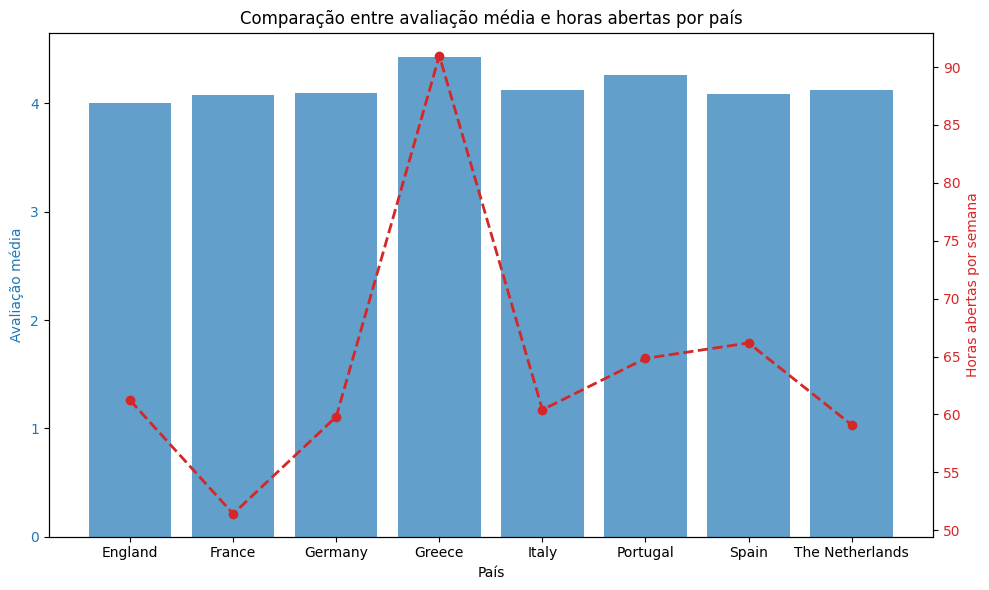

O gráfico apresenta a relação entre a **avaliação média dos restaurantes** (barras azuis, eixo esquerdo) e a **quantidade média de horas abertas por semana** (linha vermelha, eixo direito) nos oito países europeus com maior número de estabelecimentos registrados.  

A análise mostra que países como **Grécia** e **Portugal** destacam-se com elevadas avaliações médias, enquanto o tempo médio de funcionamento varia significativamente entre os países.

Essa visualização permite observar que **maior tempo de funcionamento não necessariamente implica melhores avaliações**, sugerindo que fatores como qualidade do serviço e tipo de culinária influenciam mais diretamente a satisfação dos clientes.

In [ ]:
df_rest = pd.read_csv('data\\tripadvisor_european_restaurants.csv')


df_rest = df_rest.dropna(subset=['avg_rating', 'open_hours_per_week', 'country'])


df_country = df_rest.groupby('country')[['avg_rating', 'open_hours_per_week']].mean().reset_index()


top_countries = df_rest['country'].value_counts().nlargest(8).index
df_country = df_country[df_country['country'].isin(top_countries)]

# Criar figura e dois eixos
fig, ax1 = plt.subplots(figsize=(10,6))

# Eixo Y esquerdo - Avaliação média
color = 'tab:blue'
ax1.set_xlabel('País')
ax1.set_ylabel('Avaliação média', color=color)
ax1.bar(df_country['country'], df_country['avg_rating'], color=color, alpha=0.7, label='Avaliação média')
ax1.tick_params(axis='y', labelcolor=color)

# Eixo Y direito - Horas abertas por semana
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df_country['country'], df_country['open_hours_per_week'], color=color, marker='o', linestyle='--', linewidth=2, label='Horas abertas por semana')
ax2.set_ylabel('Horas abertas por semana', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Comparação entre avaliação média e horas abertas por país')
fig.tight_layout()
plt.show()
display(Markdown("O gráfico apresenta a relação entre a **avaliação média dos restaurantes** (barras azuis, eixo esquerdo) e a **quantidade média de horas abertas por semana** (linha vermelha, eixo direito) nos oito países europeus com maior número de estabelecimentos registrados.  "))
display(Markdown("A análise mostra que países como **Grécia** e **Portugal** destacam-se com elevadas avaliações médias, enquanto o tempo médio de funcionamento varia significativamente entre os países."))
display(Markdown("Essa visualização permite observar que **maior tempo de funcionamento não necessariamente implica melhores avaliações**, sugerindo que fatores como qualidade do serviço e tipo de culinária influenciam mais diretamente a satisfação dos clientes."))